<a href="https://colab.research.google.com/github/nickbohall/NFL_Betting_Model/blob/main/Historical_Spreads_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from functools import reduce
from datetime import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NFL Model/Data/API Data/schedule_2002_to_2022.csv", index_col=0)

In [ ]:
df["home_win"] = np.where(df["result"] > 0, 0, 1)


In [ ]:
df = df[["home_win", "spread_line"]]
df = df.groupby(by="spread_line").mean().reset_index()
df["pred_win_prob"] = (-.0303 * df.spread_line + 0.50) * 100
df.home_win = df.home_win*100
df

,spread_line,home_win,pred_win_prob
0,-19.0,100.0,107.570
1,-18.0,100.0,104.540
2,-17.0,100.0,101.510
3,-16.0,100.0,98.480
4,-15.5,100.0,96.965
...,...,...,...
71,20.0,0.0,-10.600
72,20.5,0.0,-12.115
73,22.0,0.0,-16.660
74,24.0,0.0,-22.720


In [ ]:
x = df.spread_line
y = df.home_win
pred = df.pred_win_prob
r2 = r2_score(y, pred)

In [ ]:
#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

<ipython-input-147-8562dec953f4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

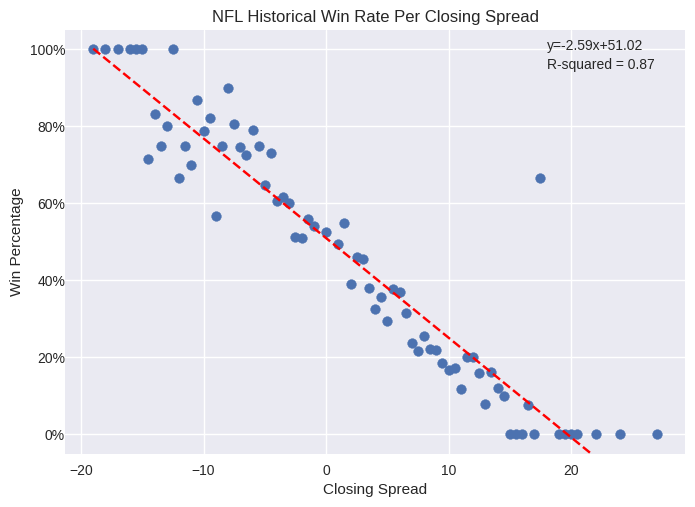

In [ ]:
plt.style.use('seaborn')

# Create the subplot function
fig, ax = plt.subplots()

# Plot the scatter
ax.scatter(x,y)

# Plot the trendline
ax.plot(x, p(x), color="red", linestyle="--")

# Titles and axes
plt.title("NFL Historical Win Rate Per Closing Spread")
plt.xlabel("Closing Spread")
plt.ylabel("Win Percentage")

# Formatting y axis as % and limiting to 0%
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set( ylim=(-5, 105))

# Plotting some text
plt.text(18, 95, 'R-squared = %0.2f' % r2)
plt.text(18, 100, "y=%.2fx+%.2f"%(z[0],z[1]))


# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Put ticks and labels back on the left
plt.setp(ax.get_yticklabels(), transform=ax.get_yaxis_transform())

